### Проблема подглядывания и последовательное тестирование

История статистики и теории принятия решений показывает, что классические методы гипотезного тестирования, такие как критерий Ньюмана-Пирсона или доверительные интервалы, были разработаны в эпоху, когда сбор данных происходил за фиксированный, заранее определенный объем. В таких условиях, если мы установили уровень значимости и мощность, то можем, основываясь на этих параметрах, провести однократное тестирование гипотезы и сделать окончательное решение. Однако в современной практике, особенно в областях, где данные собираются непрерывно или по мере необходимости — например, в клинических исследованиях, онлайн-экспериментах, промышленной диагностике — появляется новая проблема.

Эта проблема — так называемая **"peeking problem"** или проблема подглядывания. Она заключается в том, что при многократных взглядах на данные, постоянно проверяя гипотезу, увеличивается вероятность ошибочного отрицательного или положительного результата. Проще говоря, если мы смотрим на данные не один раз, а многократно, то вероятность ошибочного отклонения нулевой гипотезы (или её принятия) увеличивается, что подрывает корректность статистических выводов, заложенных в классические тесты.

Эта проблема особенно актуальна в современном мире, где автоматические системы могут в любой момент "подглядеть" за текущими результатами и принять решение. Например, в A/B тестированиях компании могут постоянно мониторить результаты, чтобы мгновенно реагировать на изменения. Однако, если при этом не предпринимать специальных мер, то уровень ложных срабатываний может стать слишком высоким, что подорвет доверие к результатам.

Это привело к необходимости пересмотреть подходы к статистическому тестированию, чтобы оно оставалось корректным даже при многократных взглядах на данные.Чтобы сохранить статистическую корректность при многократных проверках, было предложено несколько концептуальных подходов, которые можно условно разбить на 2 категории:

1. **Коррекция уровня значимости (Alpha-Spending Philosophy)**

Подход, доминирующий в клинических испытаниях, признаёт, что проверки будут в предзаданные моменты, но требуют "платы" в виде доли $\alpha$ за каждую попытку. Эти подходы использую **$\alpha$-spending функции** для распределения $\alpha$ на каждое подглядываение, гарантирование сохранения ошибки 1 рода в рамках номинаного значения.

2. **Всегда валидный вывод (Anytime-Valid Philosophy)**

Самый радикальный подход, формализованный в работах Дарлинга-Роббинса (1967) и современных исследованиях (Ramdas et al., 2020). Его кредо: вывод должен оставаться валидным даже при адаптивном выборе момента остановки. Подходы используют супермартингалы или концентрационные неравенства (например, неравенство Виддерта) для построения таких последовательностей. Пример: в онлайн-эксперименте компания может непрерывно мониторить разницу конверсий, и любой наблюдаемый эффект "сразу" статистически корректен.

\\

Таким образом, возникновение подходов последовательного тестирования — это естественная реакция статистики и теории принятия решений на проблему подглядывания и постоянного мониторинга. Эта область продолжает активно развиваться, предлагая все более универсальные и мощные инструменты для статистического анализа в условиях современного "бесконечного" мониторинга данных, что делает ее важной не только с теоретической точки зрения, но и в прикладных задачах — от медицины и инженерии до онлайн-аналитики и социальных наук.


### Sequential Probability Ratio Test

**Историческое введение**

В предвоенные годы, за десятилетие, предшествовавшее Второй мировой войне, наблюдался значительный рост промышленного производства военной продукции, особенно боеприпасов. Одной из ключевых задач стало обеспечение надежности этих изделий. Тестирование боеприпасов — дорогое и зачастую разрушительное, например, при стрельбе из пистолетов или винтовок, — требовало поиска оптимальных методов контроля качества. Встал вопрос: сколько боеприпасов необходимо испытать из партии, чтобы с высокой вероятностью оценить её надежность? Полностью израсходовать весь запас для тестирования было слишком дорого и неэффективно, ведь тогда оставались без боеприпасов.

В 1939 году группа ведущих статистиков и экономистов, объединенная в Статистическую исследовательскую группу (SGR) при Колумбийском университете, занялась решением этой проблемы. В состав группы входили такие выдающиеся ученые, как Уильям Аллен Уоллис, Якоб Вольфовиц и Абрахам Вальд. По словам Уоллиса, группа отличалась исключительным профессионализмом и талантами, что делало её, пожалуй, самой выдающейся в истории статистической науки.

Работа группы имела важное прикладное значение и была засекречена, что отражает уровень важности задач. В частности, Уоллис вспоминал, что Вальд, занимаясь разработкой последовательных тестов, сталкивался с тем, что его бумаги уводили и засекречивали, при этом сам Вальд не имел допуска к секретной информации, поскольку был "врагом по статусу". Группа работала под давлением армии США, которая требовала быстрых и практических решений для боевых условий. Например, во время битвы на Айнзе в декабре 1944 года, офицеры обсуждали параметры взрывателей с помощью результатов исследований Милтона Фридмана, чтобы быстро настроить артиллерийские снаряды для максимальной эффективности.

Ключевым результатом деятельности группы стал так называемый последовательный критерий вероятностной оценки гипотез — метод, получивший название "Последовательный критерий вероятности" (Sequential Probability Ratio Test, SPRT). Идея заключалась в том, чтобы, вместо того чтобы устанавливать фиксированный объем выборки, осуществлять тест последовательно, принимая решение о надежности партии при каждом новом испытании, что позволяло значительно сократить число испытаний и при этом сохранять высокую вероятность правильной оценки.

Идея возникла у Уоллиса и Фридмана: использовать тест, который, хотя и может быть менее эффективен при полном объеме выборки, способен быстрее обнаруживать отклонения и, следовательно, сокращать расходы времени и ресурсов. Вначале Вольфовиц и Вальд отнеслись к этой идее с некоторым скептицизм, поскольку она казалась революционной и даже "сверхмощной" — ведь она превосходила классические тесты по мощности.

Тем не менее, после обсуждений с Фридманом и Уоллисом, Вальд и Вольфовиц начали развивать эту концепцию, которая в конечном итоге стала краеугольным камнем современной теории последовательных тестов гипотез. Эти результаты оставались засекреченными до окончания войны, после чего Вальд опубликовал свою работу ["Последовательные тесты статистических гипотез"](https://www.jstor.org/stable/2235829), которая стала классикой в области статистики.

Этот вклад не только значительно продвинул теорию статистического анализа, но и нашел широкое применение в различных областях — от контроля качества и медицины до военных технологий. Разработанная в условиях секретности, идея последовательных тестов стала мощным инструментом, позволяющим принимать обоснованные решения быстро и экономично в условиях высокой неопределенности.

У нас есть 2 гипотезы о значении какой-то метрики:
$$
H_0 : \theta = \theta_0 \\
H_1 : \theta = \theta_1
$$

Функция **правдоподобия $\mathcal{L}(\theta_i, X_1,X_2, \cdots, X_n)$** показывает, насколько рероятно, что данные $X_1,X_2, \cdots, X_n$ были сгенерированы моделью с параметром $\theta_i$. Отношение правдоподобий же показывает, насколь вероятнее, что одна модель лучше описывает генерацию данных, чем другая. Мы же будем рассматривать логарифм правдоподобия, т.к. это упрощает расчёты:

$$
\Lambda_n = \lambda(X_1,X_2, \cdots, X_n) = \prod^n\frac{\mathcal{L}(\theta_1, X_1,X_2, \cdots, X_n)}{\mathcal{L}(\theta_0, X_1,X_2, \cdots, X_n)}
$$

**Sequential Probability Ratio Test** задаёт правила принятие решения в зависимости от того, где будет$\Lambda_n$ относительно $A$ и $B$ - нижней и верхней границы значения правдоподобия:

$\Lambda_n \ge B \Rightarrow H_0 \text{ выигрывает}$

$\Lambda_n \le A \Rightarrow H_1 \text{ выигрывает}$

$\Lambda_n \in (A \text{ ; } B) \Rightarrow\text{ смотрим } \Lambda_{n+1}$

Значения $A$ и $B$ можно аппроксимировать как $A \approx \log(\frac{\beta}{1-\alpha})$ и $B \approx \log(\frac{1-\beta}{\alpha})$, а вот значения правдоподобия $\Lambda$ надо выводить под каждое из распределений. Ниже мы рассмотрим вывод для Бернулиевской величины:

**Пример**

Пусть $X \sim Bernoulli(\theta,n), P(X_i = 1, \theta) = 1 - P(X_i = 0, \theta) = \theta.$

Тогда $\Lambda_n = \lambda(X_1, X_2, \cdots, X_n) = \log \frac{\theta_1^{\sum X_i}(1-\theta_1)^{n - \sum X_i}}{\theta_0^{\sum X_i} (1-\theta_0)^{n - \sum X_i}}=\log[\theta_1^{\sum X_i}(1-\theta_1)^{n - \sum X_i}] - log[\theta_0^{\sum X_i} (1-\theta_0)^{n - \sum X_i}] = \sum X_i \log \theta_1 + (n - \sum X_i) \log (1-\theta_1) - \sum X_i \log \theta_0 - (n - \sum X_i) \log (1-\theta_0) = \sum X_i \log \frac{\theta_1}{\theta_0} + (n - \sum X_i) \log \frac{1- \theta_1}{1-\theta_0} = \sum X_i \log \frac{\theta_1(1-\theta_0)}{\theta_0(1-\theta_1)} + n \log \frac{1- \theta_1}{1-\theta_0}$

Мы будем продолжать эксперимент, если

$$
\begin{cases}
\Lambda_n < B \\
\Lambda_n > A
\end{cases}
\Rightarrow
\begin{cases}
\sum X_i \log \frac{\theta_1(1-\theta_0)}{\theta_0(1-\theta_1)} + n \log \frac{1- \theta_1}{1-\theta_0} < B \\
\sum X_i \log \frac{\theta_1(1-\theta_0)}{\theta_0(1-\theta_1)} + n \log \frac{1- \theta_1}{1-\theta_0} > A
\end{cases}
\Rightarrow
\begin{cases}
\sum X_i > \rho A + \eta \rho n \\
\sum X_i < \rho B + \eta \rho n
\end{cases}
\quad \text{где}
\begin{cases}
\rho^{-1} = \log\frac{\theta_1(1-\theta_0)}{\theta_0 (1-\theta_1)} \\
\eta = \log\frac{1-\theta_0}{1-\theta_1}
\end{cases}
$$

То есть границы - параллельные прямые с $k = \rho \eta$ и $b = (\rho A, \rho B)$

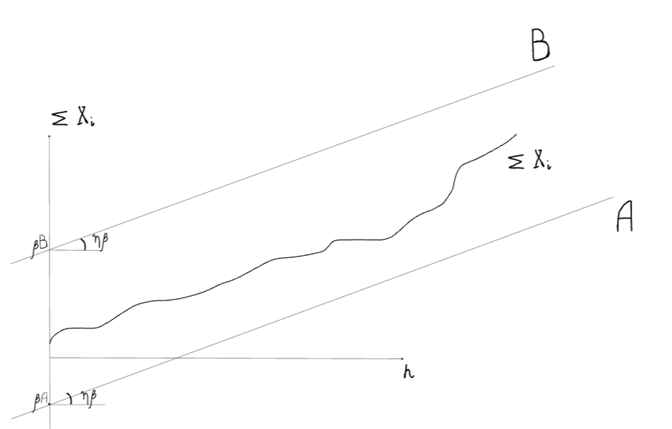

\\

Как видно, у этого подхода есть 3 главных проблемы, которые затрудняют его использование в A/B тестах:

1. **Ограничение одной выборки.** Простой SPRT предполагает, что данные поступают из одной выборки, что делает его прямое использование неприменимым для задач, где необходимо сравнивать две или более выборки.
2. **Простота дизайна альтернативной гипотезы.** Простой SPRT требует, чтобы альтернативная гипотеза была задана в виде фиксированного значения параметра $\theta_1$. Это ограничивает его гибкость, так как в реальных задачах альтернативная гипотеза часто имеет более сложный характер.
3. **Неограниченность теста.** Как видно из визуализации, границы $A$ и $B$ представляют из себя параллельные прямые, из-за чего эксперимент не имеет естественной границы остановки. (хотя с 100% вероятность статистика пересечет одну из границ, но это может быть несуразно долго)


Все последующие улучшения и дизайны последовательного тестирования призваны решить эти проблемы

#### Функции

In [80]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt
from typing import Dict, Tuple

# ================== Генерация данных ==================
def generate_ab_data(
    conversion_A: float,
    conversion_B: float,
    sample_size: int,
    random_seed: int = None
) -> Tuple[np.ndarray, np.ndarray]:
    """Генерирует данные для A/B теста."""
    if random_seed is not None:
        np.random.seed(random_seed)
    return (
        np.random.binomial(1, conversion_A, sample_size),
        np.random.binomial(1, conversion_B, sample_size)
    )

# ================== SPRT функции ==================
def binomial_log_likelihood_ratio(
    successes_A: int, failures_A: int,
    successes_B: int, failures_B: int,
    p0: float, effect_size: float  # Переименовали delta в effect_size
) -> float:
    """Вычисляет логарифмическое отношение правдоподобия для биномиального SPRT."""
    n_A = successes_A + failures_A
    n_B = successes_B + failures_B
    return (binom.logpmf(successes_B, n_B, p0 + effect_size) -
            binom.logpmf(successes_B, n_B, p0))

def run_SPRT(
    data_A: np.ndarray, data_B: np.ndarray,
    p0: float, effect_size: float,  # Переименовали delta в effect_size
    alpha: float = 0.05, beta_error: float = 0.2,  # Переименовали beta в beta_error
    max_samples: int = None
) -> Dict:
    """Выполняет последовательный SPRT тест."""
    successes_A = failures_A = successes_B = failures_B = 0
    lower_bound = np.log(beta_error / (1 - alpha))
    upper_bound = np.log((1 - beta_error) / alpha)
    log_lr_sequence = []

    max_samples = min(max_samples or len(data_A), len(data_A), len(data_B))

    for i in range(max_samples):
        successes_A += data_A[i] == 1
        failures_A += data_A[i] == 0
        successes_B += data_B[i] == 1
        failures_B += data_B[i] == 0

        current_log_lr = binomial_log_likelihood_ratio(
            successes_A, failures_A, successes_B, failures_B, p0, effect_size)
        log_lr_sequence.append(current_log_lr)

        if current_log_lr <= lower_bound:
            return {'method': 'SPRT', 'decision': 'A', 'log_lr': log_lr_sequence,
                    'stopping_step': i+1, 'bounds': (lower_bound, upper_bound),
                    'conversion_A': successes_A/(successes_A+failures_A),
                    'conversion_B': successes_B/(successes_B+failures_B)}
        elif current_log_lr >= upper_bound:
            return {'method': 'SPRT', 'decision': 'B', 'log_lr': log_lr_sequence,
                    'stopping_step': i+1, 'bounds': (lower_bound, upper_bound),
                    'conversion_A': successes_A/(successes_A+failures_A),
                    'conversion_B': successes_B/(successes_B+failures_B)}

    return {'method': 'SPRT', 'decision': 'continue', 'log_lr': log_lr_sequence,
            'stopping_step': max_samples, 'bounds': (lower_bound, upper_bound),
            'conversion_A': successes_A/(successes_A+failures_A),
            'conversion_B': successes_B/(successes_B+failures_B)}

def plot_test_results(results: Dict, ax=None):
    """Визуализация результатов теста."""
    if ax is None:
        fig, ax = plt.subplots(figsize=(17, 6))

    ax.plot(results['log_lr'], label='Статистика', color='blue')
    lower, upper = results['bounds']

    ax.axhline(upper, color='r', linestyle='--',
               label='Верхняя граница (Отклонить $H_0$)')
    ax.axhline(lower, color='g', linestyle='--',
               label='Нижняя граница (Отклонить $H_1$)')

    ax.set_xlabel('Размер выборки')
    ax.set_ylabel('Логарифм отношения правдоподобия')
    ax.set_title(f"{results['method']} - Решение: {results['decision']}")
    ax.legend()
    ax.grid(True)

    info_text = (f"Конверсия A: {results['conversion_A']:.3f}\n"
                 f"Конверсия B: {results['conversion_B']:.3f}\n"
                 f"Шагов: {results['stopping_step']}")
    ax.text(0.7, 0.15, info_text, transform=ax.transAxes,
            bbox=dict(facecolor='white', alpha=0.8))

#### Реализация

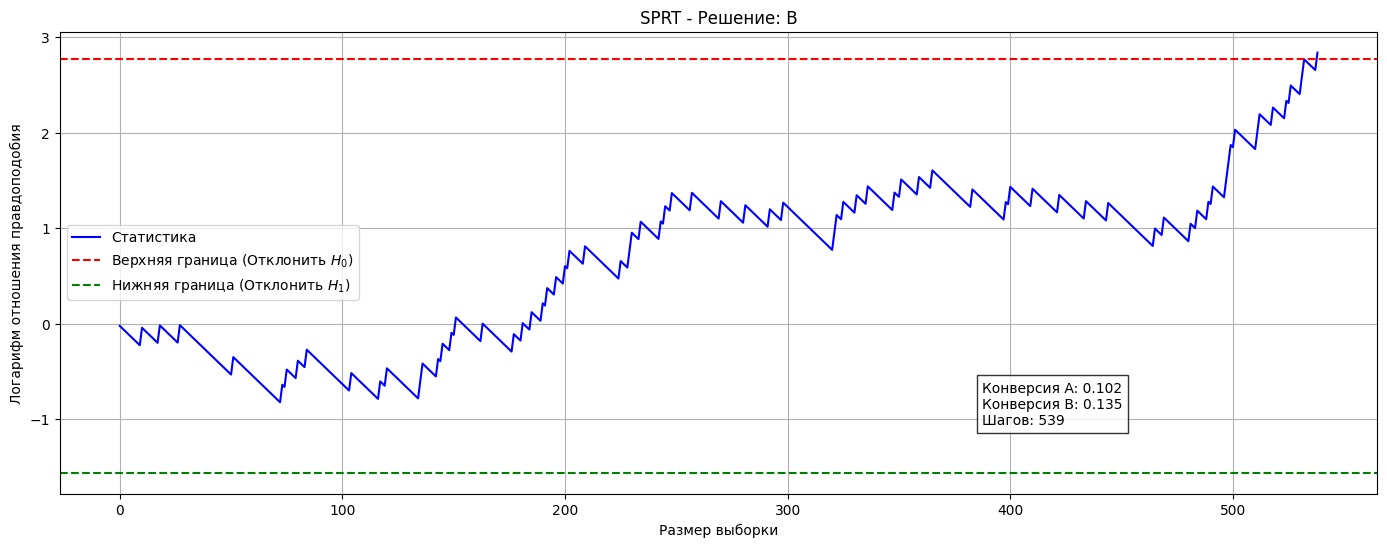

In [81]:
# Параметры эксперимента
CONVERSION_A = 0.10
CONVERSION_B = 0.12  # Эффект 2%
SAMPLE_SIZE = 10_000
RANDOM_SEED = 666

# Генерация данных (одинаковых для обоих тестов)
data_A, data_B = generate_ab_data(
    conversion_A=CONVERSION_A,
    conversion_B=CONVERSION_B,
    sample_size=SAMPLE_SIZE,
    random_seed=RANDOM_SEED
)

# Параметры тестов
p0 = CONVERSION_A
effect_size = 0.02  # Минимальный детектируемый эффект (2%)
alpha = 0.05  # Уровень значимости
beta_error = 0.2    # Вероятность ошибки II рода

sprt_res = run_SPRT(
                    data_A = data_A, data_B = data_B,
                    p0 = p0, effect_size = effect_size,
                    alpha = 0.05, beta_error = 0.2,
                    max_samples = None
                   )

plot_test_results(sprt_res)

### mixture Sequential Probability Ratio Test

mSPRT - естественное продолжение базового SPRT, призванное решить проблему ограничения одной выборки. Здесь вместо того, чтобы смотреть на конкретное значение оцениваемого параметра, предлагается оценивать (как в байесовском подходе) распределение параметра при верности альтернативной гипотезы.

Основная его идея заключается в следующем: поскольку это двусторонний тест, обозначим $H_0 : 𝜃 = 𝜃_0 $ и $H_1 : 𝜃 \neq 𝜃_0$ как нулевую и альтернативную гипотезы соответственно и определим $H$ как смешивающее распределение по $Θ$ с плотностью $h$, и пусть $f_{\theta}$ будет плотностью данных с параметром $\theta$ (правдоподобие), тогда смешивание $H$ по пространству параметров $Θ$ означает применение вероятностного распределения к возможным значениям тестируемого параметра:
$$
\Lambda_n = \int_{\Theta} \prod^{n} \frac{L(\theta_1, X_n)}{L(\theta_0, X_n)}h(\theta)d\theta
$$


Здесь $h(\theta)$ — это функция плотности смеси (везде положительная), которая контролирует распределение альтернативной гипотезы, проверяемой в отношении правдоподобия. Таким образом, mSPRT позволяет учитывать неопределённость в параметрах и делать тест более универсальным. Но пока это по прежнему одновыборочный тест.


Правило принятия решения в mSPRT аналогично правилу в простом SPRT.

#### Функции

In [82]:
import numpy as np
from scipy.stats import beta as beta_dist
import matplotlib.pyplot as plt
from typing import Dict, Tuple

def generate_ab_data(
    conversion_A: float,
    conversion_B: float,
    sample_size: int,
    random_seed: int = None
) -> Tuple[np.ndarray, np.ndarray]:
    """Генерирует данные для A/B теста."""
    if random_seed is not None:
        np.random.seed(random_seed)
    return (
        np.random.binomial(1, conversion_A, sample_size),
        np.random.binomial(1, conversion_B, sample_size)
    )

def mSPRT_log_likelihood_ratio(
    successes_A: int, failures_A: int,
    successes_B: int, failures_B: int,
    prior_alpha: float = 0.5, prior_beta: float = 0.5
) -> float:
    """Вычисляет логарифмическое отношение правдоподобия для mSPRT."""
    return (beta_dist.logpdf(0.5, prior_alpha + successes_A + successes_B,
                           prior_beta + failures_A + failures_B) -
            beta_dist.logpdf(0.5, prior_alpha + successes_A, prior_beta + failures_A) -
            beta_dist.logpdf(0.5, prior_alpha + successes_B, prior_beta + failures_B) +
            np.log(2))

def run_mSPRT(
    data_A: np.ndarray, data_B: np.ndarray,
    alpha: float = 0.05, power: float = 0.8,
    prior_alpha: float = 0.5, prior_beta: float = 0.5,
    max_samples: int = None
) -> Dict:
    """Выполняет последовательный mSPRT тест."""
    successes_A = failures_A = successes_B = failures_B = 0
    lower_bound = np.log((1 - power) / (1 - alpha))
    upper_bound = np.log(power / alpha)
    log_lr_sequence = []

    max_samples = min(max_samples or len(data_A), len(data_A), len(data_B))

    for i in range(max_samples):
        successes_A += data_A[i] == 1
        failures_A += data_A[i] == 0
        successes_B += data_B[i] == 1
        failures_B += data_B[i] == 0

        current_log_lr = mSPRT_log_likelihood_ratio(
            successes_A, failures_A, successes_B, failures_B, prior_alpha, prior_beta)
        log_lr_sequence.append(current_log_lr)

        if current_log_lr <= lower_bound:
            return {'method': 'mSPRT', 'decision': 'A', 'log_lr': log_lr_sequence,
                    'stopping_step': i+1, 'bounds': (lower_bound, upper_bound),
                    'conversion_A': successes_A/(successes_A+failures_A),
                    'conversion_B': successes_B/(successes_B+failures_B)}
        elif current_log_lr >= upper_bound:
            return {'method': 'mSPRT', 'decision': 'B', 'log_lr': log_lr_sequence,
                    'stopping_step': i+1, 'bounds': (lower_bound, upper_bound),
                    'conversion_A': successes_A/(successes_A+failures_A),
                    'conversion_B': successes_B/(successes_B+failures_B)}

    return {'method': 'mSPRT', 'decision': 'continue', 'log_lr': log_lr_sequence,
            'stopping_step': max_samples, 'bounds': (lower_bound, upper_bound),
            'conversion_A': successes_A/(successes_A+failures_A),
            'conversion_B': successes_B/(successes_B+failures_B)}

def plot_test_results(results: Dict, ax=None):
    """Визуализация результатов теста."""
    if ax is None:
        fig, ax = plt.subplots(figsize=(17, 6))

    ax.plot(results['log_lr'], label='Статистика', color='blue')
    lower, upper = results['bounds']

    ax.axhline(upper, color='r', linestyle='--',
               label='Верхняя граница (Отклонить $H_0$)')
    ax.axhline(lower, color='g', linestyle='--',
               label='Нижняя граница (Отклонить $H_1$)')

    ax.set_xlabel('Размер выборки')
    ax.set_ylabel('Логарифм отношения правдоподобия')
    ax.set_title(f"{results['method']} - Решение: {results['decision']}")
    ax.legend()
    ax.grid(True)

    info_text = (f"Конверсия A: {results['conversion_A']:.3f}\n"
                 f"Конверсия B: {results['conversion_B']:.3f}\n"
                 f"Шагов: {results['stopping_step']}")
    ax.text(0.7, 0.15, info_text, transform=ax.transAxes,
            bbox=dict(facecolor='white', alpha=0.8))

#### Реализация

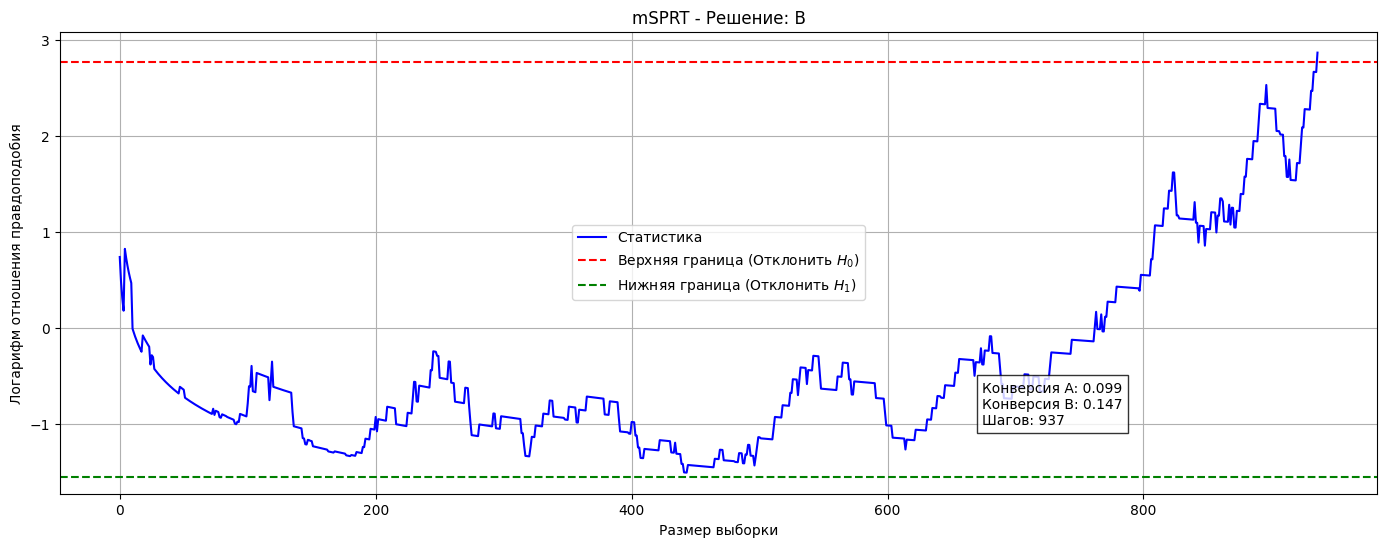

In [83]:
# Параметры эксперимента
CONVERSION_A = 0.10
CONVERSION_B = 0.12  # Эффект 2%
SAMPLE_SIZE = 10_000
RANDOM_SEED = 666

# Генерация данных (одинаковых для обоих тестов)
data_A, data_B = generate_ab_data(
    conversion_A=CONVERSION_A,
    conversion_B=CONVERSION_B,
    sample_size=SAMPLE_SIZE,
    random_seed=RANDOM_SEED
)

# Параметры тестов
p0 = CONVERSION_A
alpha = 0.05  # Уровень значимости
beta_error = 0.2    # Вероятность ошибки II рода

msprt_res = run_mSPRT(
                      data_A = data_A, data_B = data_B,
                      alpha = 0.05, power = 0.8,
                      prior_alpha = 0.5, prior_beta = 0.5,
                      max_samples = None
                     )

plot_test_results(msprt_res)

### Always Valid Inference

Always-Valid Inference (всегда валидный статистический вывод) — это подход в статистике, где p-значения и доверительные интервалы остаются валидными (корректными) на протяжении всего последовательного сбора данных, а не только в фиксированный момент времени.

Формально p-значение называется **always-valid**, если для любого момента времени $t$ и любого уровня значимости $\alpha$:
$$
P(\text{p-value}_{t} \le \alpha \mid H_0) \le \alpha
$$

AVI включают в себя несколько больших класов подходов:

* **Последовательные тесты** - останавливаются, когда накоплено "достаточно доказательств".

* **Always-Valid p-значения** - специальные p-значения, которые можно проверять многократно.

* **Последовательные доверительные интервалы** - интервалы, которые остаются валидными при любом промежуточном размере выборки.

#### Функции

In [84]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from typing import Tuple, Dict

def generate_ab_data(conversion_A: float, conversion_B: float, n_samples: int, seed: int = None) -> Tuple[np.ndarray, np.ndarray]:
    """Генерация данных A/B теста."""
    if seed is not None:
        np.random.seed(seed)
    return (
        np.random.binomial(1, conversion_A, n_samples),
        np.random.binomial(1, conversion_B, n_samples)
    )

def always_valid_p_value(successes: np.ndarray, trials: np.ndarray, p0: float) -> np.ndarray:
    """
    Вычисляет always-valid p-значение для последовательности биномиальных данных.
    Основано на конфиденциальных последовательностях (Robbins, 1970).
    """
    cumulative_successes = np.cumsum(successes)
    deviations = cumulative_successes - trials * p0
    sigma = np.sqrt(trials * p0 * (1 - p0) + 1e-10)
    scaled_deviations = deviations / sigma
    return np.exp(-0.5 * np.maximum.accumulate(scaled_deviations ** 2))

def always_valid_ci(successes: np.ndarray, trials: np.ndarray, alpha: float = 0.05) -> Tuple[np.ndarray, np.ndarray]:
    """
    Always-Valid доверительный интервал для пропорции.
    Основан на методе Waudby-Smith & Ramdas (2021).
    """
    cumulative_successes = np.cumsum(successes)
    n = trials.astype(float)
    p_hat = cumulative_successes / n

    lambda_seq = np.sqrt(2 * np.log(2 / alpha) / (n * np.sqrt(np.maximum(p_hat * (1 - p_hat), 0.25))))
    lambda_seq = np.minimum(lambda_seq, 0.5)

    width = lambda_seq * np.sqrt(p_hat * (1 - p_hat)) * np.sqrt(2 * np.log(2 / alpha) / n)
    lower = p_hat - width
    upper = p_hat + width

    return np.clip(lower, 0, 1), np.clip(upper, 0, 1)

def run_avi_ab_test(data_A: np.ndarray, data_B: np.ndarray, alpha: float = 0.05) -> Dict:
    """Запускает Always-Valid A/B тест для сравнения конверсий."""
    trials = np.arange(1, len(data_A) + 1)
    successes_A = np.cumsum(data_A)
    successes_B = np.cumsum(data_B)

    p0 = successes_A[-1] / len(data_A)
    p_values_A = always_valid_p_value(data_A, trials, p0)
    p_values_B = always_valid_p_value(data_B, trials, p0)

    ci_A_lower, ci_A_upper = always_valid_ci(data_A, trials, alpha)
    ci_B_lower, ci_B_upper = always_valid_ci(data_B, trials, alpha)

    decision = 'continue'
    stopping_step = len(data_A)
    for t in range(len(data_A)):
        if p_values_A[t] < alpha or p_values_B[t] < alpha:
            decision = 'B' if p_values_B[t] < p_values_A[t] else 'A'
            stopping_step = t + 1
            break

    return {
        'decision': decision,
        'stopping_step': stopping_step,
        'p_values_A': p_values_A,
        'p_values_B': p_values_B,
        'ci_A': (ci_A_lower, ci_A_upper),
        'ci_B': (ci_B_lower, ci_B_upper),
        'conversion_A': successes_A[-1] / len(data_A),
        'conversion_B': successes_B[-1] / len(data_B)
    }

def plot_avi_results(results: Dict, alpha: float = 0.05):
    """Улучшенная визуализация результатов AVI теста."""
    plt.figure(figsize=(17, 10))

    # 1. График p-значений
    plt.subplot(2, 1, 1)
    plt.plot(results['p_values_A'], label='Группа A (контроль)', color='blue', linewidth=2)
    plt.plot(results['p_values_B'], label='Группа B (тест)', color='orange', linewidth=2)

    plt.axhline(alpha, color='red', linestyle='--', label=f'Уровень значимости (α={alpha})')
    plt.fill_between(range(len(results['p_values_A'])),
                    0, alpha, color='red', alpha=0.1)

    if results['decision'] != 'continue':
        stop_idx = results['stopping_step'] - 1
        plt.scatter(stop_idx, min(results['p_values_A'][stop_idx], results['p_values_B'][stop_idx]),
                   color='green', s=100, zorder=5, label='Точка остановки')

    plt.title('Динамика always-valid p-значений', pad=20, fontsize=14)
    plt.xlabel('Количество пользователей', fontsize=12)
    plt.ylabel('p-значение', fontsize=12)
    plt.yscale('log')
    plt.legend()
    plt.grid(True, which="both", ls="--", alpha=0.5)
    plt.xlim(0, len(results['p_values_A']))

    # 2. График конверсий
    plt.subplot(2, 1, 2)
    x_vals = np.arange(1, len(results['p_values_A']) + 1)

    plt.fill_between(x_vals, results['ci_A'][0], results['ci_A'][1],
                    color='blue', alpha=0.1, label='ДИ группы A')
    plt.fill_between(x_vals, results['ci_B'][0], results['ci_B'][1],
                    color='orange', alpha=0.1, label='ДИ группы B')

    plt.axhline(results['conversion_A'], color='blue', linestyle='-',
               label=f'Конверсия A: {results["conversion_A"]:.2%}')
    plt.axhline(results['conversion_B'], color='orange', linestyle='-',
               label=f'Конверсия B: {results["conversion_B"]:.2%}')

    plt.title('Конверсии с always-valid доверительными интервалами', pad=20, fontsize=14)
    plt.xlabel('Количество пользователей', fontsize=12)
    plt.ylabel('Конверсия', fontsize=12)
    plt.legend()
    plt.grid(True, which="both", ls="--", alpha=0.5)
    plt.xlim(0, len(results['p_values_A']))
    plt.ylim(0, max(max(results['ci_A'][1]), max(results['ci_B'][1])) * 1.1)

    plt.tight_layout()
    plt.show()

#### Реализация

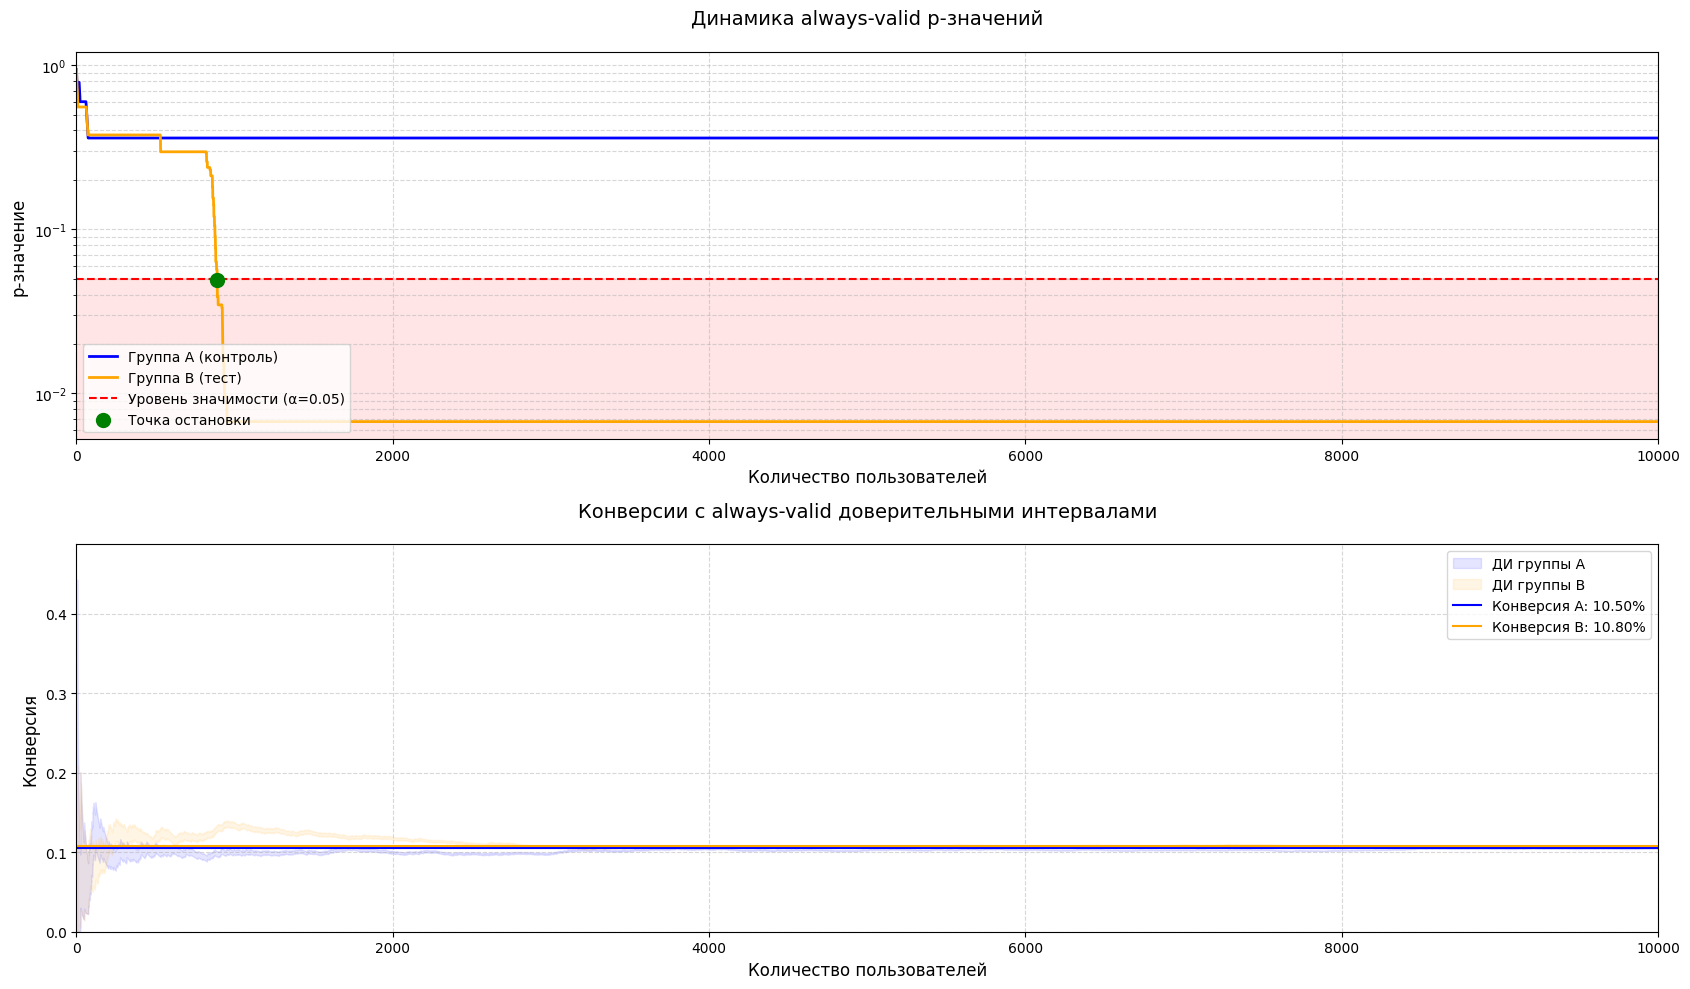

In [85]:
# Параметры эксперимента
CONVERSION_A = 0.10
CONVERSION_B = 0.11  # Эффект 3%
SAMPLE_SIZE = 10_000
RANDOM_SEED = 666
ALPHA = 0.05

# Генерация данных
data_A, data_B = generate_ab_data(
    conversion_A=CONVERSION_A,
    conversion_B=CONVERSION_B,
    n_samples=SAMPLE_SIZE,
    seed=RANDOM_SEED
)

# Запуск Always-Valid теста
results = run_avi_ab_test(data_A, data_B, alpha=ALPHA)

# Визуализация результатов
plot_avi_results(results, alpha=ALPHA)

### Group Sequential Testing

Group Sequential Tests являются адаптацией обычной z-статистики под условия подглядываний. В этом методе в качестве функции используется обычная z-статистика, посчитанная на группе, а границы строятся на основе выбранной alpha-spending функции. Alpha-spending функция задает правило, по которому уровень значимости $\alpha$ расходуется на каждом этапе анализа, чтобы общий уровень значимости эксперимента не превышал значение  $\alpha$.



Пусть у нас есть броуновское движение $W(t) : 0 < t ≤ 1$ и мы хотим посмотреть, в какое время  $\tau$ процесс пересечет границу  $b(t) = z_{\alpha/2}$ в первый раз. Если  $\alpha^*(t) = \mathbb{P}(\tau \leq t \mid 0 \leq t \leq 1)$,то известно:
$$
\alpha^*(t) = \begin{cases}     0, & \text{если } t = 0, \\     2 - 2 \cdot \Phi\left(\frac{z_{\alpha/2}}{\sqrt{t}}\right), & \text{если } t > 0, \end{cases}
$$
где  $\Phi$— функция стандартного нормального распределения. Заметим, что $\alpha^*(t)$ — возрастающая функция, такая, что $\alpha^*(1) = \alpha$.Допустим, мы подсматриваем, пересекло ли броуновское движение границу, только в моменты  $\leq t_1, t_2, \dots, t_K = 1$.Можем назначить кумулятивную вероятность пересечения границы  $\alpha^*(t_1)$ точке  $t_1$ ,определив $b_1$ так, чтобы она удовлетворяла следующему:

$$
\mathbb{P}(B(t_1) > b_1) = \mathbb{P}(\tau \in [0, t_1]) = \alpha^*(t_1)
$$
Точно так же мы можем определить константы  $b_i = b_2, b_3, \dots, b_K$ так, чтобы:

$$
\mathbb{P}(B(t_j) < b_j, j = 1, \dots, i-1; B(t_i) > b_i) =  \mathbb{P}(\tau \in [t_{i-1}, t_i]) = \alpha^*(t_{i}) - \alpha^*(t_{i-1}).
$$

$b_1$ находится аналитически, а вот $b_2, \dots, b_K$ требуют численных методов интегрирования. Заметим, что $b_i$ зависит только от выбора $\alpha^*(t)$ и предыдущих $b_j, 1 \leq j  < i$.

В примере выше $\alpha^*(t)$ — alpha-spending-функция.

Идея GST заключается в том, что можно брать другие функции распределения α, которые строго возрастают по t и удовлетворяют условию $\alpha^*(1) = \alpha$. На основе последовательной траты $\alpha$ (то есть, на основе распределения уровня значимости на каждом промежуточном этапе анализа) и вычисляются границы, чтобы вероятность ошибки первого рода контролировалась.

**Выбор alpha-spending function**

Базово есть 5 семейств таких функций:

$\alpha - \text{номинальное значение ошибки 1 рода} \left( \text{если гипотеза двусторонняя, то значение берётся вдвое меньше} \right)$

$\mathrm{t} - \text{доля пользователей, которое уже попала в тест в момент оценки эксперимента} \left( \mathrm{t} \in \left[0;1 \right] \right)$

| Наименование | Функция $\alpha(t)$ |
|---|---|
| O'Brien-Fleming | $\alpha(t) = 2 - 2 \cdot \Phi\left( \frac{Z_0}{\sqrt{t}} \right)$ |
| Pocock | $\alpha(t) = \alpha \cdot \ln \left(1 + (\mathrm{e} - 1) \cdot t \right)$ |
| Uniform | $\alpha(t) = \alpha \cdot t$ |
| Kim & DeMets Power Family | $\alpha(t) = \alpha \cdot t^{x}$ |
| Hwang, Shih & De Cani Gamma family | $\alpha(t) = \begin{cases} \alpha \cdot t, & \text{если } \gamma = 0 \\ \alpha \cdot \frac{1 - e^{-\gamma \cdot t}}{1 - e^{-\gamma}}, & \text{если } \gamma \neq 0 \end{cases}$ |

#### Функции

In [101]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
import warnings
warnings.filterwarnings("ignore")

def select_naive_alpha(n, N, N_peek, alpha):
    return alpha

def select_alpha_bonferroni(n, N, N_peek, alpha):
    P = len(N_peek)
    return alpha / P

def select_uniform_alpha(n, N, N_peek, alpha):
    t = n / N
    return alpha * t

def select_alpha_gst_pocock(n, N, N_peek, alpha):
    t = n / N
    return alpha * np.log(1 + (np.exp(1) - 1) * t)

def select_alpha_gst_obrien_fleming(n, N, N_peek, alpha, rho=1):
    t = n / N
    return 4 - 4 * cdf(ppf(1 - alpha/4) / t**(rho/2))

def select_power_family_alpha(n, N, N_peek, alpha, x=3):
    t = n / N
    return alpha * t**x

def select_gama_family_alpha(n, N, N_peek, alpha, g=5):
    t = n / N
    if g == 0:
        return alpha * t
    return alpha * (1 - math.exp(-g*t)) / (1 - math.exp(-g))

def plot_peeking(dfi, obs, k=1):
    ns = np.reshape(np.arange(1, np.shape(obs)[0]+1), (-1, 1))
    means = np.cumsum(obs, axis=0) / ns
    # Plot
    fig, ax = plt.subplots(figsize=(17, 4))
    for n in N_peek:
        color = "red" if dfi[f"width{n}"][k] > dfi[f"mean{n}"][k] else "green"
        ax.errorbar(x=[n-1], y=dfi[f"mean{n}"][k], yerr=dfi[f"width{n}"][k], c=color, lw=0, elinewidth=2, capsize=6, marker="o", markersize=6)
    sns.lineplot(x=range(30, np.shape(obs)[0]), y=means[:,k][30:], lw=3, ax=ax);
    ax.axhline(y=0, lw=1)
    ax.set(xlim=(0, np.shape(obs)[0]+10), xlabel="Подглядывание", title="Средний эффект и доверительные интервалы")

def compute_intervals(select_alpha, obs, N_peek, alpha=0.05, **kwargs):
    N, K = np.shape(obs)
    ns = np.reshape(np.arange(1, N+1), (-1, 1))
    means = np.cumsum(obs, axis=0) / ns
    stdevs = np.sqrt(np.cumsum((obs - means)**2, axis=0) / ns)

    # Compute intervals at each peeking time
    df_intervals = pd.DataFrame({"k": range(K)})
    df_intervals["rejected_0"] = False
    df_intervals["rejected_1"] = False
    df_intervals["length"] = max(N_peek)
    for t, n in enumerate(N_peek):
        df_intervals[f"mean{n}"] = means[n-1, :]
        df_intervals[f"width{n}"] = ppf(1 - select_alpha(n, N, N_peek, alpha, **kwargs)/2) * stdevs[n-1, :] / np.sqrt(n)
        df_intervals[f"lowerb{n}"] = means[n-1, :] - df_intervals[f"width{n}"]
        df_intervals[f"upperb{n}"] = means[n-1, :] + df_intervals[f"width{n}"]
        df_intervals[f"coverage{n}"] = (df_intervals[f"lowerb{n}"] <= mu) & (df_intervals[f"upperb{n}"] >= mu)
        df_intervals["rejected_0"] = df_intervals["rejected_0"] | (df_intervals[f"lowerb{n}"] >= 0) | (df_intervals[f"upperb{n}"] <= 0)
        df_intervals[f"power{n}"] = df_intervals["rejected_0"]
        df_intervals["rejected_1"] = df_intervals["rejected_1"] | ~df_intervals[f"coverage{n}"]
        df_intervals[f"falsep{n}"] = df_intervals["rejected_1"]
        df_intervals["length"] = np.minimum(df_intervals["length"], n) * df_intervals["rejected_0"] + max(N_peek) * (1 - df_intervals["rejected_0"])
    return df_intervals

def check_performance(dfi):
    df_perf = dfi[list(dfi.filter(regex="coverage|power|falsep"))].copy()
    df_perf["idx"] = 1
    df_perf = df_perf.groupby("idx", as_index=False).mean()
    df_perf = pd.wide_to_long(df_perf, stubnames=["coverage", "power", "falsep"], i="idx", j="n").reset_index().drop(columns="idx")
    return df_perf

def plot_coverage_power(dfi, alpha=0.05, beta=0.8):
    df_perf = check_performance(dfi)

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17, 3))

    # Plot Coverage
    sns.lineplot(df_perf, x="n", y="coverage", c="C0", ax=ax1)
    ax1.axhline(y=1-alpha, ls="--", lw=2, c="C0")
    ax1.set(title="Покрытие", ylabel="", ylim=(0.90, 1.01))

    # Plot power
    sns.lineplot(df_perf, x="n", y="power", c="C1", ax=ax2)
    ax2.axhline(y=beta, ls="--", lw=2, c="C1")
    ax2.set(title="Мощность", ylabel="Мощность", ylim=(0.60, 1.05))

    # Plot false positives
    sns.lineplot(df_perf, x="n", y="falsep", c="C2", ax=ax3)
    ax3.axhline(y=alpha, ls="--", lw=2, c="C2")
    ax3.set(title="False Positive Rate", ylabel="FPR", ylim=(-0.01, 0.5))

#### Реализация

Необходимый размер выборки для T теста: 3139
Средняя длина теста GST: 1031
Выигрышь по размеру: 2108 (67%)


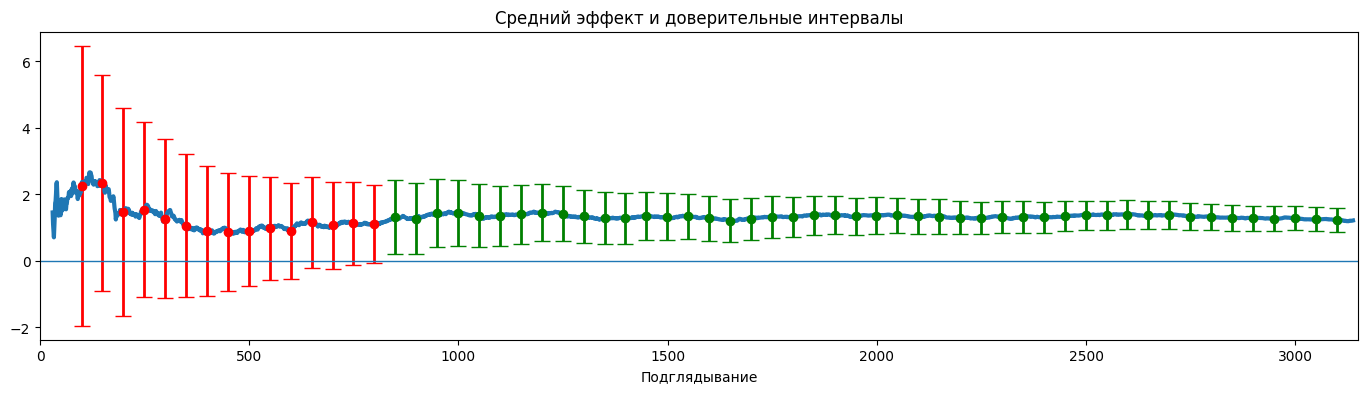

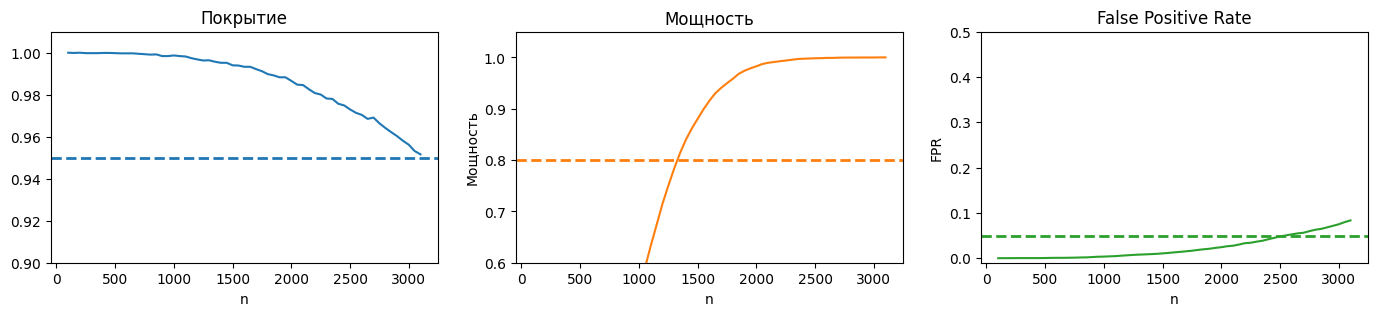

In [102]:
# номинальные уровни ошибок теста
alpha, beta  = 0.05, 0.2

mu, sigma = 1, 10

ppf = sp.stats.norm(0, 1).ppf
cdf = sp.stats.norm(0, 1).cdf

# необходимый размер для fixed-horizon теста
z_alpha = ppf(1 - alpha/2)
z_beta = ppf(1 - beta)
N = int((2 * sigma * (z_alpha + z_beta) / mu)**2)

# генерируем матрицу с результатами
K = 10_000
obs = np.random.normal(mu, sigma, size=(N, K))

N_peek = np.arange(100, N+1, 50, dtype=int) # задаём подглядывания (начиная с 100 измерения каждые 50)
dfi_naive = compute_intervals(select_power_family_alpha, obs, N_peek, x=3) # считаем интервалы и результаты теста на каждом подглядывании
plot_peeking(dfi_naive, obs, k=69) # отображаем результат метрики и CI для конкретного k эксперимента
plot_coverage_power(dfi_naive) # фактические ASN, Coverage, Power и FPR

sample_win_pct = np.round((N - dfi_naive.length.mean()) * 100 / N,2)
print(f"Необходимый размер выборки для T теста: {N:.0f}\nСредняя длина теста GST: {dfi_naive.length.mean():.0f}\nВыигрышь по размеру: {(N - dfi_naive.length.mean()):.0f} ({sample_win_pct :.0f}%)" )

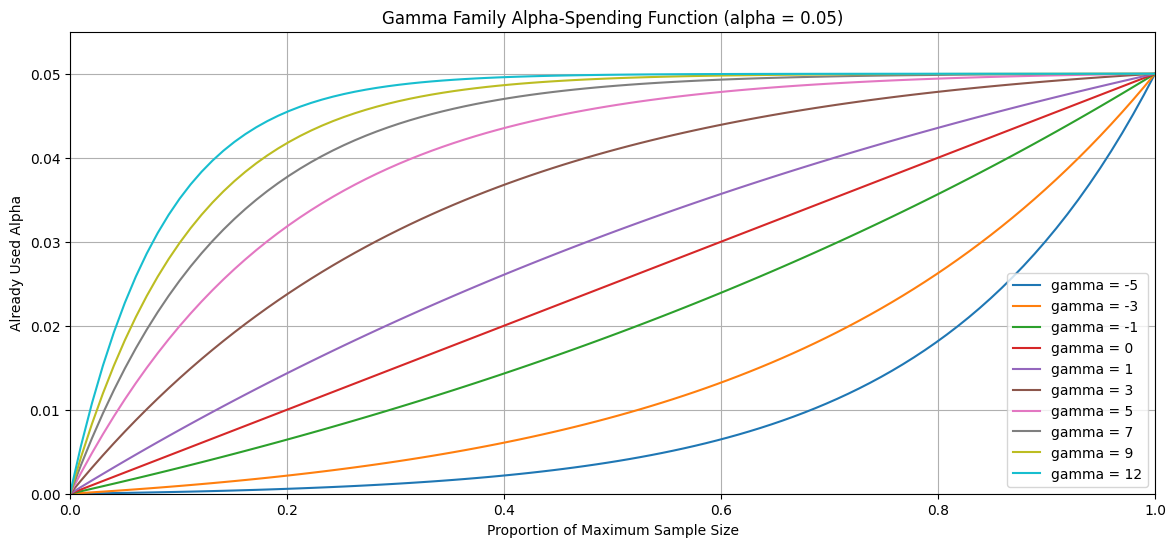

In [90]:
alpha = 0.05
gamma_values = [-5,-3,-1, 0, 1, 3, 5, 7, 9, 12]
N = 1_000

t_values = np.linspace(0, 1, 100)

# Create the plot
plt.figure(figsize=(14, 6))

for g in gamma_values:
    alpha_values = [select_gama_family_alpha(t * N, N, None, alpha, g) for t in t_values]
    plt.plot(t_values, alpha_values, label=f"gamma = {g}")

plt.xlabel("Proportion of Maximum Sample Size")
plt.ylabel("Already Used Alpha")
plt.title(f"Gamma Family Alpha-Spending Function (alpha = {alpha})")
plt.grid(True)
plt.xlim(0, 1)
plt.ylim(0, alpha * 1.1)
plt.legend()
plt.show()

### Сравнение подходов

**Always Valid Inference**

* Плюсы
  1. Простота реализации.
  2. Допускает неограниченную выборку, и ожидаемый размер выборки не требуется заранее.
  3. Допускает произвольные правила остановки.
  4. Поддержка потоковых и пакетных данных.

* Минусы
  1. Требует от экспериментатора выбора параметров смешанного распределения, т.е. распределения, описывающего эффект при альтернативной гипотезе.
  2. Сложнее понять тем, кто прошел обучение по традиционной проверке гипотез. Вероятно, потребуется некоторое время, прежде чем вводные курсы по статистике будут рассматривать эти тесты.
  3. По своей сути обладает меньшей производительностью при пакетном анализе данных по сравнению с потоковой обработкой.

**Group Sequential Testing**

* Плюсы

  1. Не нужно заранее решать, сколько тестов проведить или на каком этапе сбора данных их проведить. Если вообще не просматривать данные во время сбора, тест после завершения фазы сбора данных будет в точности соответствовать традиционному z-тесту.
  2. Альфа может быть потрачена произвольно в течение времени, и альфа тратится только во время просмотра — если пропустить просмотр, то можно сохранить неиспользованную альфу на потом.
  3. Легко объяснить благодаря связи с z-тестами.

* Минусы

  1. Необходимо заранее знать или иметь возможность оценить максимальный размер выборки.
  2. Необходимо выбрать альфа-функцию расходов. Если всегда достигается запланированный размера выборки, этот выбор некритичен, но если наблюдается слишком мало пользователей, выбор функции расходов может существенно повлиять на свойства мощности.
  3. Критические значения, используемые в тесте, необходимо получить путем численного решения интегралов. Эта численная задача становится более сложной при большом количестве прерывистых анализов, и поэтому нецелесообразно использовать GST в потоковом режиме.
